In [1]:
import pandas as pd
import numpy as np
import plotly
plotly.tools.set_credentials_file(username='sherry9788', api_key='Cw40WD6lRwalI8wtPd72')
import plotly.plotly as py
import plotly.graph_objs as go
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Video_Games_Sales_as_at_22_Dec_2016.csv')
df.shape

(16719, 16)

In [3]:
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
Name               16717 non-null object
Platform           16719 non-null object
Year_of_Release    16450 non-null float64
Genre              16717 non-null object
Publisher          16665 non-null object
NA_Sales           16719 non-null float64
EU_Sales           16719 non-null float64
JP_Sales           16719 non-null float64
Other_Sales        16719 non-null float64
Global_Sales       16719 non-null float64
Critic_Score       8137 non-null float64
Critic_Count       8137 non-null float64
User_Score         10015 non-null object
User_Count         7590 non-null float64
Developer          10096 non-null object
Rating             9950 non-null object
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


## Variables

In [5]:
df.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

In [6]:
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'],
      dtype='object')

In [7]:
df2 = df.copy().dropna()
df2.shape
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6825 entries, 0 to 16706
Data columns (total 16 columns):
Name               6825 non-null object
Platform           6825 non-null object
Year_of_Release    6825 non-null float64
Genre              6825 non-null object
Publisher          6825 non-null object
NA_Sales           6825 non-null float64
EU_Sales           6825 non-null float64
JP_Sales           6825 non-null float64
Other_Sales        6825 non-null float64
Global_Sales       6825 non-null float64
Critic_Score       6825 non-null float64
Critic_Count       6825 non-null float64
User_Score         6825 non-null object
User_Count         6825 non-null float64
Developer          6825 non-null object
Rating             6825 non-null object
dtypes: float64(9), object(7)
memory usage: 906.4+ KB


In [8]:
df.Platform.unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [9]:
data = [go.Histogram(x=df.Platform)]
py.iplot(data, filename='Platform Frequency')

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~sherry9788/0 or inside your plot.ly account where it is named 'Platform Frequency'


In [19]:
platform = df.Platform.value_counts()
print(platform)

PS2     2161
DS      2152
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      432
PS4      393
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
GB        98
NES       98
DC        52
GEN       29
NG        12
SCD        6
WS         6
3DO        3
TG16       2
PCFX       1
GG         1
Name: Platform, dtype: int64


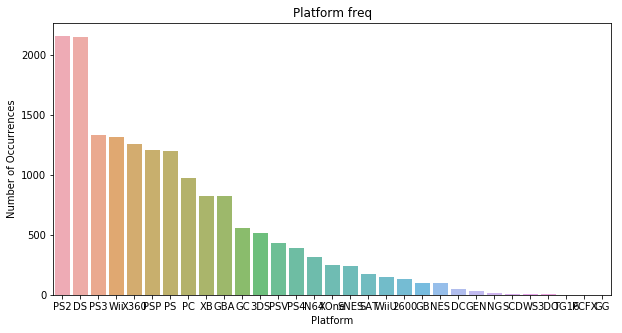

In [24]:
plt.figure(figsize=(10,5))
sns.barplot(platform.index, platform.values, alpha=0.8)
plt.title('Platform freq')
plt.ylabel('Number of Occurrences')
plt.xlabel('Platform')
plt.show()

In [25]:
df.Genre.unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

In [27]:
genre = df.Genre.value_counts()
print(genre)

Action          3370
Sports          2348
Misc            1750
Role-Playing    1500
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       874
Fighting         849
Strategy         683
Puzzle           580
Name: Genre, dtype: int64


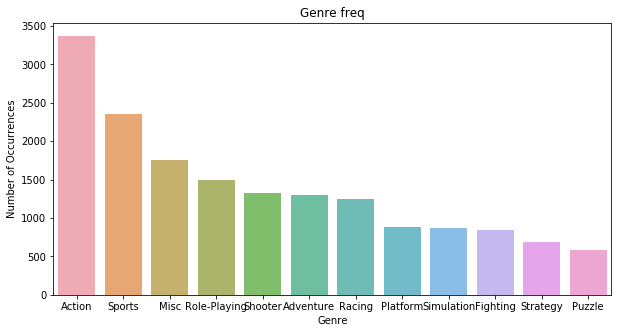

In [28]:
plt.figure(figsize=(10,5))
sns.barplot(genre.index, genre.values, alpha=0.8)
plt.title('Genre freq')
plt.ylabel('Number of Occurrences')
plt.xlabel('Genre')
plt.show()

In [32]:
df.Publisher.unique()

array(['Nintendo', 'Microsoft Game Studios', 'Take-Two Interactive',
       'Sony Computer Entertainment', 'Activision', 'Ubisoft',
       'Bethesda Softworks', 'Electronic Arts', 'Sega', 'SquareSoft',
       'Atari', '505 Games', 'Capcom', 'GT Interactive',
       'Konami Digital Entertainment', 'Square Enix',
       'Sony Computer Entertainment Europe', 'Virgin Interactive',
       'LucasArts', 'Warner Bros. Interactive Entertainment',
       'Universal Interactive', 'Eidos Interactive', 'RedOctane',
       'Vivendi Games', 'Enix Corporation', 'Namco Bandai Games',
       'Palcom', 'Hasbro Interactive', 'THQ', 'Fox Interactive',
       'Acclaim Entertainment', 'MTV Games', 'Disney Interactive Studios',
       nan, 'Codemasters', 'Majesco Entertainment', 'Red Orb', 'Level 5',
       'Arena Entertainment', 'Midway Games', 'JVC', 'Deep Silver',
       'NCSoft', '989 Studios', 'UEP Systems', 'Parker Bros.', 'Maxis',
       'Imagic', 'Tecmo Koei', 'ASCII Entertainment', 'Valve Software',


In [33]:
len(df.Publisher.unique())

582

In [34]:
np.sort(df.Year_of_Release.unique())

array([1980., 1981., 1982., 1983., 1984., 1985., 1986., 1987., 1988.,
       1989., 1990., 1991., 1992., 1993., 1994., 1995., 1996., 1997.,
       1998., 1999., 2000., 2001., 2002., 2003., 2004., 2005., 2006.,
       2007., 2008., 2009., 2010., 2011., 2012., 2013., 2014., 2015.,
       2016., 2017., 2020.,   nan])

In [35]:
df2.Year_of_Release = df2.Year_of_Release.astype(int)

In [36]:
df.Genre.unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

In [37]:
df.User_Score.unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [38]:
df2.User_Score = df2.User_Score.astype(float)
print(df2.User_Score.max())
print(df2.User_Score.min())

9.6
0.5


In [39]:
df2.User_Count = df2.User_Count.astype(int)
print(df2.User_Count.max())
print(df2.User_Count.min())

10665
4


In [54]:
df2.Critic_Score = df2.Critic_Score.astype(float)
print(df2.Critic_Score.max())
print(df2.Critic_Score.min())

98.0
13.0


In [55]:
df2.Critic_Count = df2.Critic_Count.astype(int)
print(df2.Critic_Count.max())
print(df2.Critic_Count.min())

113
3


In [40]:
df.Developer.unique()

array(['Nintendo', nan, 'Good Science Studio', ..., 'Big Red Software',
       'Atomic Games', 'Interchannel-Holon'], dtype=object)

In [41]:
len(df.Developer.unique())

1697

In [50]:
sony_studio = df.loc[(df.Publisher.isna()==False) & (df.Publisher.str.contains('Sony')), 'Developer'].value_counts()
print(sony_studio[np.arange(10)])

SCEA San Diego Studios    30
989 Sports                24
SCEE London Studio        23
SCE Japan Studio          17
SCEA                      16
Namco                     12
Naughty Dog               10
SCEE                       9
Zipper Interactive         8
Clap Hanz                  8
Name: Developer, dtype: int64


In [43]:
len(sony_studio)

133

    We notice that Developers are usually studios of a Publiser. We consider Developer as a more detailed information about the "owner" of the video game. Since Developer has more missing values, we remove this column to see if we can resolve the problem with missing values.

In [44]:
np.sort(df2.Rating.unique())

array(['AO', 'E', 'E10+', 'K-A', 'M', 'RP', 'T'], dtype=object)

In [51]:
rating = df.Rating.value_counts()
print(rating)

E       3991
T       2961
M       1563
E10+    1420
EC         8
RP         3
K-A        3
AO         1
Name: Rating, dtype: int64


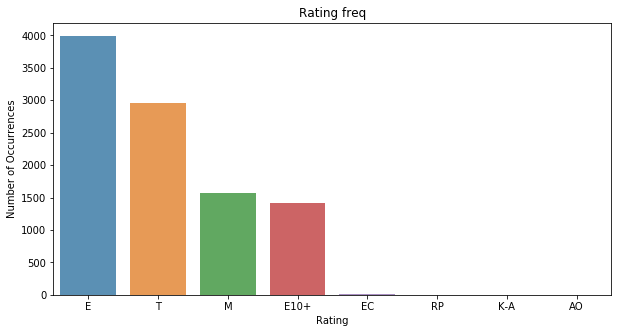

In [52]:
plt.figure(figsize=(10,5))
sns.barplot(rating.index, rating.values, alpha=0.8)
plt.title('Rating freq')
plt.ylabel('Number of Occurrences')
plt.xlabel('Rating')
plt.show()

In [45]:
df3 = df.copy().drop('Developer', axis=1)
df3.shape

(16719, 15)

In [46]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 15 columns):
Name               16717 non-null object
Platform           16719 non-null object
Year_of_Release    16450 non-null float64
Genre              16717 non-null object
Publisher          16665 non-null object
NA_Sales           16719 non-null float64
EU_Sales           16719 non-null float64
JP_Sales           16719 non-null float64
Other_Sales        16719 non-null float64
Global_Sales       16719 non-null float64
Critic_Score       8137 non-null float64
Critic_Count       8137 non-null float64
User_Score         10015 non-null object
User_Count         7590 non-null float64
Rating             9950 non-null object
dtypes: float64(9), object(6)
memory usage: 1.9+ MB


In [47]:
df3.dropna().shape

(6825, 15)

## Exploratory Analysis of the Data